#Data Analyst Interview Notebook

## Introduction

This notebook is designed to simulate real-world data that you could see from our technology.

It is designed to test your proficiency with Python and Pandas, and your ability to find and present insights.

This data is confidential; we expect you to not share this data with anyone. And we expect you to not get any external assistance.



---


You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

Each section has defined questions along with point values to help you prioritize your time.

In addition to the defined questions, the overall notebook and code presentation will be evaluated, and you will be awarded up to 10 points based on the clarity, cleaniness, and efficiency of the code.


## Part 0: Imports

Import necessary packages and

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# YOUR CODE HERE:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('tote_shipment.xlsx')
df.head()

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.4
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.4
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.4
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.3
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.4


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [ ]:
# YOUR CODE HERE:
#(1) How many unique cases were we tracking throughout this pilot.
df['asset_id'].unique()
#print(df['asset_id'].nunique()) para ver el numero

array([  2,  37,  52,  58,  59,  62,  70,  84, 102, 145, 149, 159, 167,
       170, 181, 182, 200, 205])

In [ ]:
#(2) What are the unique zones we could see
df['Zone'].unique()


array(['dock_doors_DC1', 'dock_doors_DC2', 'Forklift3_DC1',
       'pallet_assembly_DC1', 'PhoneKit1Bridge', 'PhoneKit2Bridge',
       'PhoneKit2GW', 'point_of_sale_Store', 'receiving_Store',
       'staging_DC1', 'staging_DC2', 'store_back_Store',
       'store_front_Store', 'Forklift1_DC1', 'PhoneKit1GW'], dtype=object)

In [ ]:
#(3)How many POI's are in each Zone.
df.groupby(['Zone'])['asset_id'].nunique()

Zone
Forklift1_DC1          14
Forklift3_DC1          17
PhoneKit1Bridge        18
PhoneKit1GW            15
PhoneKit2Bridge        18
PhoneKit2GW            18
dock_doors_DC1         16
dock_doors_DC2         12
pallet_assembly_DC1    16
point_of_sale_Store    13
receiving_Store        18
staging_DC1            18
staging_DC2             7
store_back_Store       18
store_front_Store      18
Name: asset_id, dtype: int64

### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [ ]:
# YOUR CODE HERE:
#What is the temperature range we see?
#rango: min - max
temp_min = df['Temperature_C'].min()
temp_max = df['Temperature_C'].max()

print("El rango de temperatura es:")
print('temperatura minima:', temp_min)
print('Temperatura maxima:', temp_max)


El rango de temperatura es:
temperatura minima: 19.0
Temperatura maxima: 44.0


In [ ]:
#Where is temperature the highest and lowest
df.loc[df['Temperature_C']== temp_min, ['Site', 'Zone', 'Temperature_C']]

,Site,Zone,Temperature_C
92279,Store,store_back_Store,19.0


In [ ]:
df.loc[df['Temperature_C']== temp_max, ['Site', 'Zone', 'Temperature_C']]

,Site,Zone,Temperature_C
57195,Store,receiving_Store,44.0
57196,Store,receiving_Store,44.0
57197,Store,receiving_Store,44.0
57199,Store,receiving_Store,44.0
59985,Store,store_back_Store,44.0


## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [ ]:
from datetime import datetime, date

Transformamos y agregamos la columna Fecha a dato datetime para poder trabajar con el

In [ ]:
df['Fecha'] = pd.to_datetime(df.time_est).dt.date
df

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F,Fecha
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.40,2022-08-02
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.40,2022-08-02
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.40,2022-08-02
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.30,2022-08-02
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.40,2022-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...
130056,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:48:51.273,47.74923,-65.64101,23.1,73.58,2022-08-04
130057,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:49:58.699,47.74923,-65.64101,23.5,74.30,2022-08-04
130058,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:52:45.173,47.74923,-65.64101,23.0,73.40,2022-08-04
130059,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:53:48.228,47.74923,-65.64101,23.0,73.40,2022-08-04


Seleccionamos solo el caso 52 para trabajar con el

In [ ]:
# YOUR CODE HERE:
case_52 = df[df['asset_id']==52]
case_52

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F,Fecha
19610,tote,52,(01)00850027865010(21)0082T0685,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 12:02:55.971,47.791580,-65.689020,23.0,73.40,2022-08-02
19611,tote,52,(01)00850027865010(21)0082T0685,DC 1,Forklift1_DC1,E2F5A528ABFC,2022-08-02 13:20:32.790,47.792910,-65.689600,23.0,73.40,2022-08-02
19612,tote,52,(01)00850027865010(21)0082T0685,DC 1,Forklift1_DC1,E2F5A528ABFC,2022-08-02 13:24:20.536,47.791580,-65.689020,23.0,73.40,2022-08-02
19613,tote,52,(01)00850027865010(21)0082T1101,DC 1,Forklift1_DC1,E2F5A528ABFC,2022-08-02 13:21:13.307,47.793000,-65.689560,22.5,72.50,2022-08-02
19614,tote,52,(01)00850027865010(21)0082T0685,DC 1,Forklift3_DC1,6EEDDB0D6881,2022-08-02 12:11:02.095,47.791580,-65.689020,23.0,73.40,2022-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...
26424,tote,52,(01)00850027865010(21)0082T1101,Store,store_front_Store,6AF833197EE3,2022-08-05 12:42:59.878,47.749230,-65.641010,24.8,76.64,2022-08-05
26425,tote,52,(01)00850027865010(21)0082T1101,Store,store_front_Store,6AF833197EE3,2022-08-05 12:44:28.920,47.749230,-65.641010,24.5,76.10,2022-08-05
26426,tote,52,(01)00850027865010(21)0082T1101,Store,store_front_Store,6AF833197EE3,2022-08-05 12:48:54.942,47.749230,-65.641010,24.5,76.10,2022-08-05
26427,tote,52,(01)00850027865010(21)0082T1101,Store,store_front_Store,6AF833197EE3,2022-08-05 12:54:17.715,47.749388,-65.640811,24.5,76.10,2022-08-05


seleccionamos solo las columnas tiempo, temperatura y zona para ver el recorrido de el asset

Se ordenan los datos por fecha, time_est

In [ ]:
db_52 = case_52[['Fecha','time_est', 'Site', 'Zone']].sort_values('time_est')
db_52

,Fecha,time_est,Site,Zone
25304,2022-08-02,2022-08-02 11:59:41.040,DC 1,staging_DC1
25307,2022-08-02,2022-08-02 11:59:53.891,DC 1,staging_DC1
25308,2022-08-02,2022-08-02 12:00:06.907,DC 1,staging_DC1
19615,2022-08-02,2022-08-02 12:00:56.899,DC 1,Forklift3_DC1
25305,2022-08-02,2022-08-02 12:01:29.910,DC 1,staging_DC1
...,...,...,...,...
25301,2022-08-05,2022-08-05 13:27:17.818,Store,receiving_Store
22795,2022-08-05,2022-08-05 13:27:56.696,Store,receiving_Store
25302,2022-08-05,2022-08-05 13:27:57.584,Store,receiving_Store
22796,2022-08-05,2022-08-05 13:28:20.850,Store,receiving_Store


promedio de tiempo

In [ ]:
db_52.groupby(['Site','Zone']).time_est.mean()

Site     Zone               
DC 1     Forklift1_DC1         2022-08-02 13:22:02.211000064
         Forklift3_DC1         2022-08-02 12:05:59.496999936
         dock_doors_DC1        2022-08-02 12:02:55.971000064
         staging_DC1           2022-08-02 12:30:11.696571648
Store    point_of_sale_Store   2022-08-04 10:55:42.715666688
         receiving_Store       2022-08-05 00:00:15.221326848
         store_back_Store      2022-08-05 00:12:51.274443520
         store_front_Store     2022-08-04 16:46:21.274200064
Transit  PhoneKit1Bridge       2022-08-03 09:20:55.326241024
         PhoneKit1GW           2022-08-03 18:10:27.198428672
         PhoneKit2Bridge       2022-08-03 09:19:49.926006272
         PhoneKit2GW           2022-08-03 06:54:45.267965696
Name: time_est, dtype: datetime64[ns]

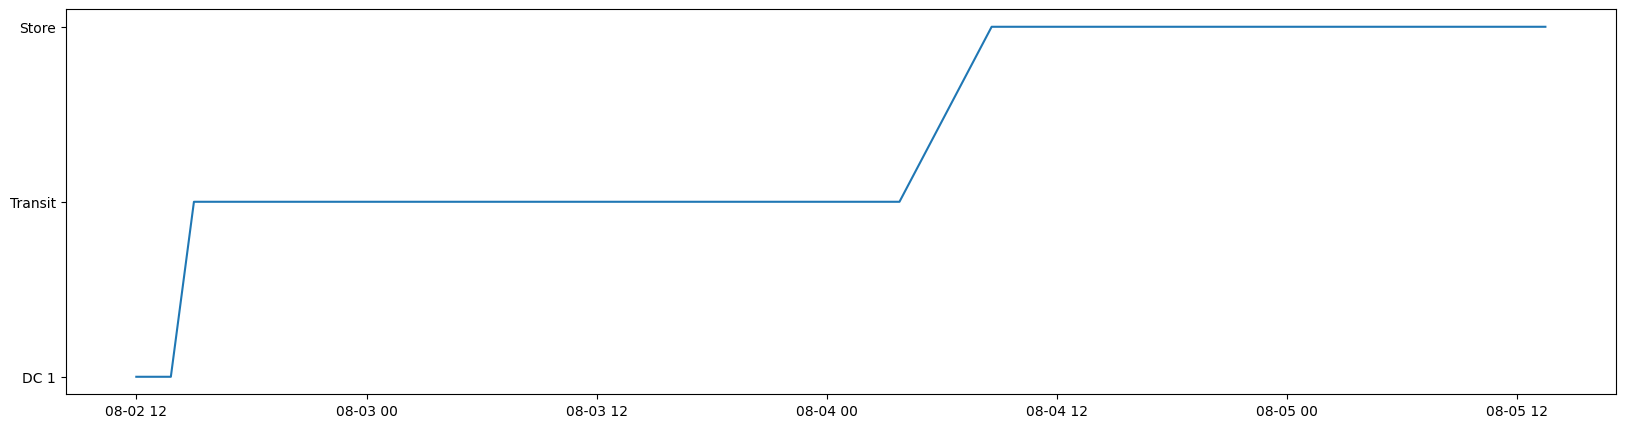

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.plot(db_52['time_est'],db_52['Site'])
#plt.figure(figsize = (20,5))
plt.figure(figsize=[20,5])
plt.show()

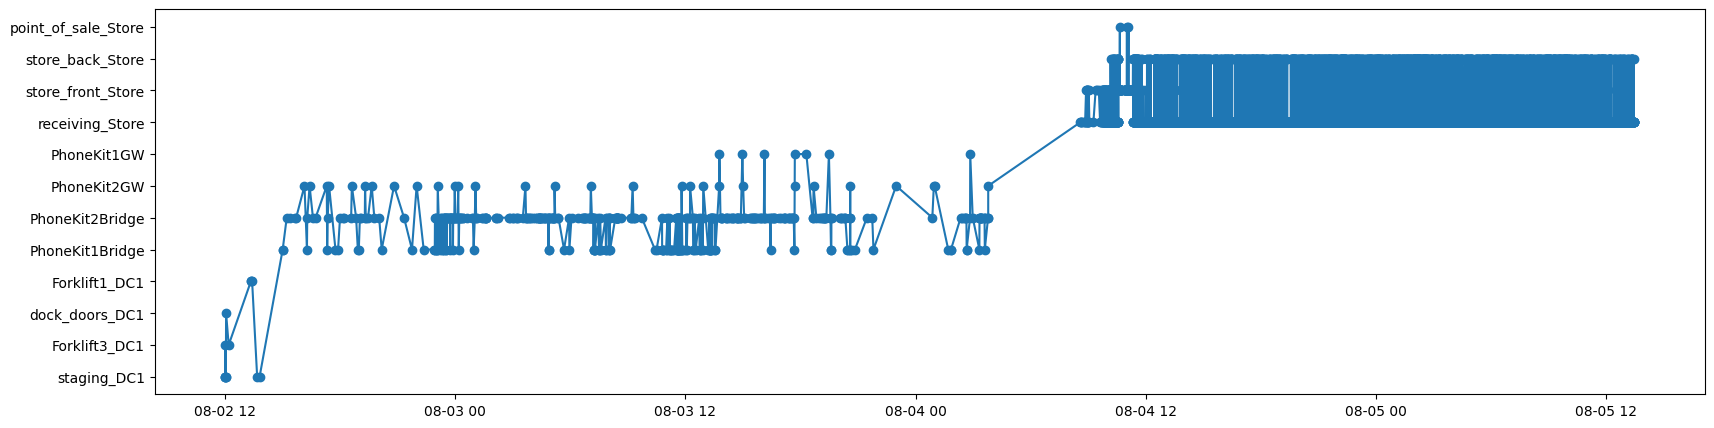

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.plot(db_52['time_est'],db_52['Zone'], marker = 'o')
plt.figure(figsize=[15,5])
plt.show()

### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



In [ ]:
pd.to_datetime(df['Fecha'], format="%Y-%m-%d")

0        2022-08-02
1        2022-08-02
2        2022-08-02
3        2022-08-02
4        2022-08-02
            ...    
130056   2022-08-04
130057   2022-08-04
130058   2022-08-04
130059   2022-08-04
130060   2022-08-04
Name: Fecha, Length: 130061, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df['time_est'], format="%Y-%m-%d %H:%M:%S")

0        2022-08-02 11:59:26.628
1        2022-08-02 12:00:22.660
2        2022-08-02 12:01:11.234
3        2022-08-02 13:47:58.172
4        2022-08-02 11:58:55.049
                   ...          
130056   2022-08-04 12:48:51.273
130057   2022-08-04 12:49:58.699
130058   2022-08-04 12:52:45.173
130059   2022-08-04 12:53:48.228
130060   2022-08-04 16:33:25.525
Name: time_est, Length: 130061, dtype: datetime64[ns]

In [ ]:
#agrupo por tiempo,fecha, zonas y temperatura del registro 52
t_time = case_52[['time_est', 'Temperature_C']].sort_values('time_est')
t_time

,time_est,Temperature_C
25304,2022-08-02 11:59:41.040,23.00
25307,2022-08-02 11:59:53.891,22.50
25308,2022-08-02 12:00:06.907,22.50
19615,2022-08-02 12:00:56.899,22.50
25305,2022-08-02 12:01:29.910,23.00
...,...,...
25301,2022-08-05 13:27:17.818,25.00
22795,2022-08-05 13:27:56.696,27.25
25302,2022-08-05 13:27:57.584,25.00
22796,2022-08-05 13:28:20.850,27.50


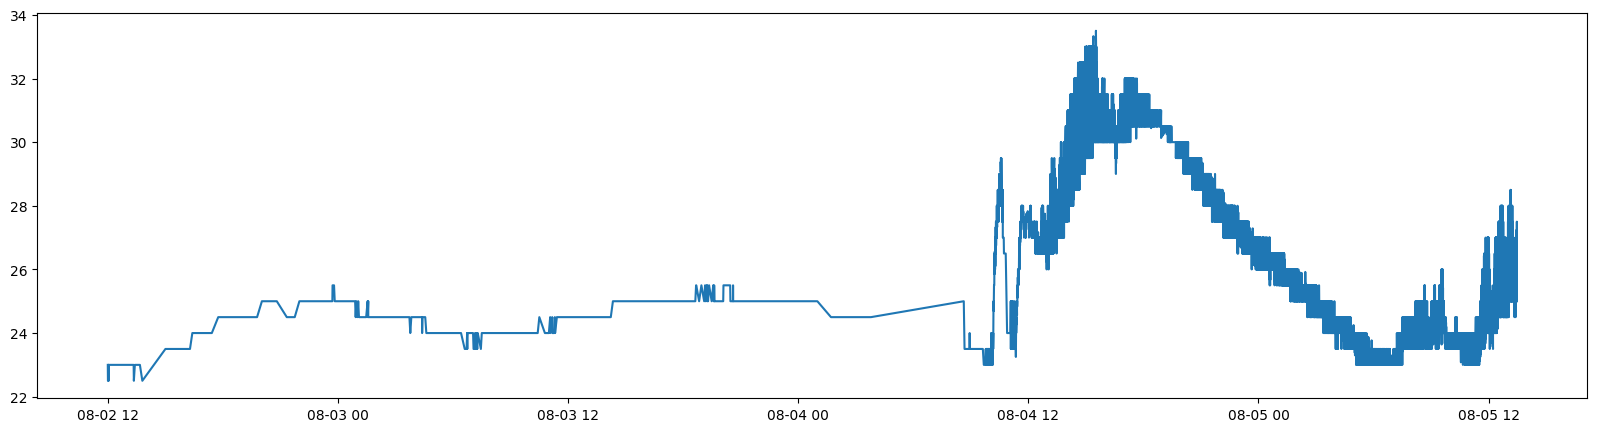

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.plot(t_time['time_est'],t_time['Temperature_C'])
plt.figure(figsize=[15,5])
plt.show()

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(case_52, lat='lat', lon='lng',
                        mapbox_style='open-street-map', zoom = 3.8, title='California Housing - Map Visualization')
fig.update_layout(autosize=True)
fig.show()

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE
df.groupby(['Site']).time_est.median()

Site
DC 1      2022-08-02 12:58:45.491000064
DC 2      2022-08-03 14:39:48.595000064
Store     2022-08-04 23:40:24.556000000
Transit   2022-08-03 11:05:39.385500160
Name: time_est, dtype: datetime64[ns]

In [ ]:
df.Site.unique()

array(['DC 1', 'DC 2', 'Transit', 'Store'], dtype=object)

YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE
site_zone = case_52[['Site', 'Zone']]
site_zone.groupby(['Site'])['Zone'].unique()

Site
DC 1       [dock_doors_DC1, Forklift1_DC1, Forklift3_DC1,...
Store      [point_of_sale_Store, receiving_Store, store_b...
Transit    [PhoneKit1Bridge, PhoneKit1GW, PhoneKit2Bridge...
Name: Zone, dtype: object

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [ ]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

YOUR TEXT ANSWER HERE
